In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler

# loading and eda data

In [75]:
data=pd.read_csv('train.csv')
dtest=pd.read_csv('test.csv')

In [76]:
data_d=data.drop(['Id'],axis=1)
data_t_d=dtest.drop(['Id'],axis=1)
data_d

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,158000
1195,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
1196,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
1197,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000


## Preprocessing

In [77]:
for i in data_d[data_d.SalePrice>400000]['SalePrice'].index:
    data_d.iloc[i,79]=data_d['SalePrice'].median()
data_d

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,158000
1195,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
1196,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
1197,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000


<AxesSubplot:>

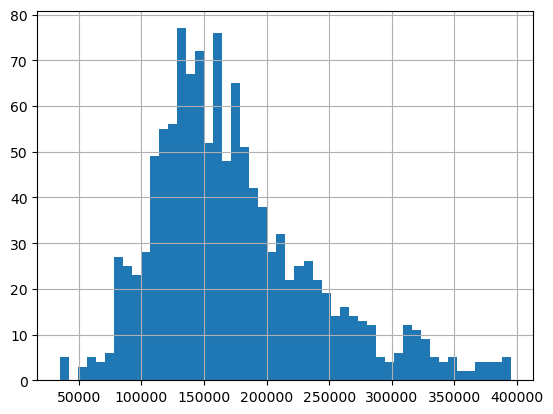

In [78]:
data_d['SalePrice'].hist(bins=50)

In [79]:
data_d['OverallQual']=data_d['OverallQual'].astype(str)
data_d['OverallCond']=data_d['OverallCond'].astype(str)
data_d['MSSubClass']=data_d['MSSubClass'].astype(str)
data_t_d['OverallQual']=data_t_d['OverallQual'].astype(str)
data_t_d['OverallCond']=data_t_d['OverallCond'].astype(str)
data_t_d['MSSubClass']=data_t_d['MSSubClass'].astype(str)

In [80]:
colum_num=[]
colum_cat=[]
for i in data_t_d.columns:
    if data_d[i].dtype=='object':
        colum_cat.append(i)
    else: colum_num.append(i)

In [81]:
len(colum_num)

33

In [82]:
len(colum_cat)

46

In [83]:
df=pd.concat([data_d.drop('SalePrice',axis=1),data_t_d],axis=0)

In [84]:
for i in colum_cat:
    df[i]=df[i].replace(np.nan,'No'+i)

In [85]:
for i in colum_num:
    df[i]=df[i].replace(np.nan,df[i].median())

In [87]:
print(df.isnull().sum().sum())
print(df.isnull().sum().sum())

0
0


In [141]:
ax=[0]
for i in colum_cat:
    for j in data_t_d[i].unique():
        for z in data_d[i].unique():
            if j==z:
                break
            elif j!=z and z==data_d[i].unique()[-1]:
                ax.append(i)
                break
            if i == ax[-1]:
                break
ax

[0,
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'MiscFeature']

 # droped data

In [88]:
# prepare input data
def prepare_inputs(d1,colum_cat,colum_num):
    data_enc1 = {}
    for j in colum_cat:
        le = LabelEncoder()
        le.fit(d1[j])
        train_enc1 = le.transform(d1[j])
        data_enc1[j]=train_enc1
    for z in colum_num:
        data_enc1[z]=d1[z]
    return data_enc1

In [89]:
df_label=prepare_inputs(df,colum_cat,colum_num)

In [90]:
ct=ColumnTransformer([('cat',OneHotEncoder(),colum_cat)],remainder='passthrough')

In [91]:
ct.fit(pd.DataFrame(df_label))

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(),
                                 ['MSSubClass', 'MSZoning', 'Street', 'Alley',
                                  'LotShape', 'LandContour', 'Utilities',
                                  'LotConfig', 'LandSlope', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'OverallQual', 'OverallCond',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', ...])])

In [92]:
df_label=ct.transform(pd.DataFrame(df_label)).toarray()

In [96]:
train_data=pd.DataFrame(df_label)

# normalizing

In [97]:
norm=MinMaxScaler()

In [101]:
train_data=pd.DataFrame(norm.fit_transform(train_data))

# train_test_split

In [106]:
X=train_data.iloc[0:1199]
X_per=train_data.iloc[1199:]
Y=data_d['SalePrice']/data_d['SalePrice'].max()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.001, random_state=44)
X

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.210860,0.442240,0.065814,0.000000,0.0,0.0,0.0,0.0,0.181818,1.00
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.282087,0.116686,0.043876,0.000000,0.0,0.0,0.0,0.0,0.545455,0.50
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.465444,0.116686,0.031079,0.000000,0.0,0.0,0.0,0.0,0.909091,0.00
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.158674,0.000000,0.000000,0.597826,0.0,0.0,0.0,0.0,0.545455,0.00


# modeling

In [121]:
def plot_loss(history):
    plt.plot((history.history['loss'])*data_d['SalePrice'].max(), label='loss')
    plt.plot((history.history['val_loss'])*data_d['SalePrice'].max(), label='val_loss')
    #plt.ylim([12000, 60000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [210]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(335))
model.add(tf.keras.layers.Dense(1,activation='relu'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1)                 336       
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [211]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss= tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.losses.MeanAbsoluteError()
)
early_stop=EarlyStopping(patience=10)

In [212]:
h=model.fit(x=X_train,y=Y_train,batch_size=10,epochs=200,validation_split=0.2,
            callbacks=[early_stop])

Epoch 1/200
96/96 [==============================] - 1s 6ms/step - loss: 0.2046 - mean_absolute_error: 0.4079 - val_loss: 0.1998 - val_mean_absolute_error: 0.3938
Epoch 2/200
96/96 [==============================] - 0s 5ms/step - loss: 0.1854 - mean_absolute_error: 0.3721 - val_loss: 0.1712 - val_mean_absolute_error: 0.3532
Epoch 3/200
96/96 [==============================] - 0s 4ms/step - loss: 0.1440 - mean_absolute_error: 0.3149 - val_loss: 0.1106 - val_mean_absolute_error: 0.2663
Epoch 4/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0988 - mean_absolute_error: 0.2565 - val_loss: 0.0784 - val_mean_absolute_error: 0.2199
Epoch 5/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0774 - mean_absolute_error: 0.2252 - val_loss: 0.0637 - val_mean_absolute_error: 0.2002
Epoch 6/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0660 - mean_absolute_error: 0.2084 - val_loss: 0.0560 - val_mean_absolute_error: 0.1880
Epoch 7/200
96/96 [===

96/96 [==============================] - 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0695 - val_loss: 0.0084 - val_mean_absolute_error: 0.0692
Epoch 52/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0689 - val_loss: 0.0082 - val_mean_absolute_error: 0.0684
Epoch 53/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0682 - val_loss: 0.0081 - val_mean_absolute_error: 0.0677
Epoch 54/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0677 - val_loss: 0.0079 - val_mean_absolute_error: 0.0671
Epoch 55/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0671 - val_loss: 0.0079 - val_mean_absolute_error: 0.0669
Epoch 56/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0658 - val_loss: 0.0077 - val_mean_absolute_error: 0.0661
Epoch 57/200
96/96 [=========

96/96 [==============================] - 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0509 - val_loss: 0.0061 - val_mean_absolute_error: 0.0549
Epoch 102/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0509 - val_loss: 0.0059 - val_mean_absolute_error: 0.0540
Epoch 103/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0507 - val_loss: 0.0060 - val_mean_absolute_error: 0.0541
Epoch 104/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0503 - val_loss: 0.0060 - val_mean_absolute_error: 0.0547
Epoch 105/200
96/96 [==============================] - 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0505 - val_loss: 0.0059 - val_mean_absolute_error: 0.0538
Epoch 106/200
96/96 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0506 - val_loss: 0.0059 - val_mean_absolute_error: 0.0541
Epoch 107/200
96/96 [===

In [213]:
hist = pd.DataFrame(h.history)
hist['epoch'] = h.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
121,0.005801,0.049316,0.005990,0.054338,121
122,0.005784,0.048930,0.006003,0.054531,122
123,0.005728,0.048649,0.005929,0.053339,123
124,0.005709,0.048613,0.006092,0.053919,124
125,0.005737,0.048724,0.006002,0.053340,125


In [214]:
np.array(hist['val_loss']*data_d['SalePrice'].max()).min()

2327.4584506824613

In [215]:
np.array(hist['val_loss']*data_d['SalePrice'].max()).min()

2327.4584506824613

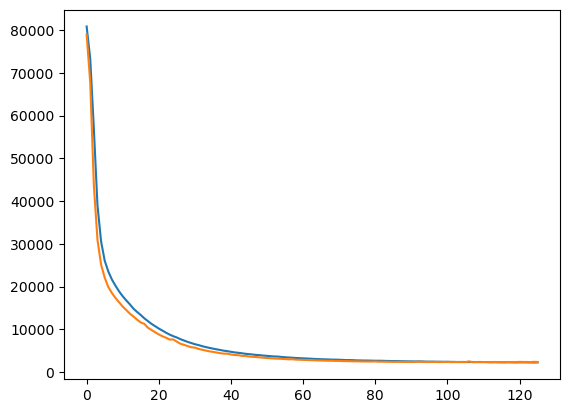

In [216]:
plt.plot((hist['loss'])*data_d['SalePrice'].max(), label='loss')
plt.plot((hist['val_loss'])*data_d['SalePrice'].max(), label='val_loss')

# evaluation

In [217]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 99ms/step - loss: 8.9205e-04 - mean_absolute_error: 0.0234


[0.0008920480031520128, 0.02339942753314972]

# production

In [186]:
y=model.predict(X_per)

9/9 [==============================] - 0s 3ms/step


In [187]:
b={'Id':[]}
for i in range(1,261):
    b['Id'].append(i)

In [188]:
df=pd.concat([pd.DataFrame(b),pd.DataFrame(y,columns=['SalePrice'])],axis=1)

In [189]:
df.to_csv('sample8.csv')